In [1]:
from matplotlib import pyplot as plt
from matplotlib import patches
import numpy as np
import matplotlib

%matplotlib notebook

In [2]:
matplotlib.__version__

'2.0.2'

In [3]:
np.__version__

'1.11.3'

<IPython.core.display.Javascript object>


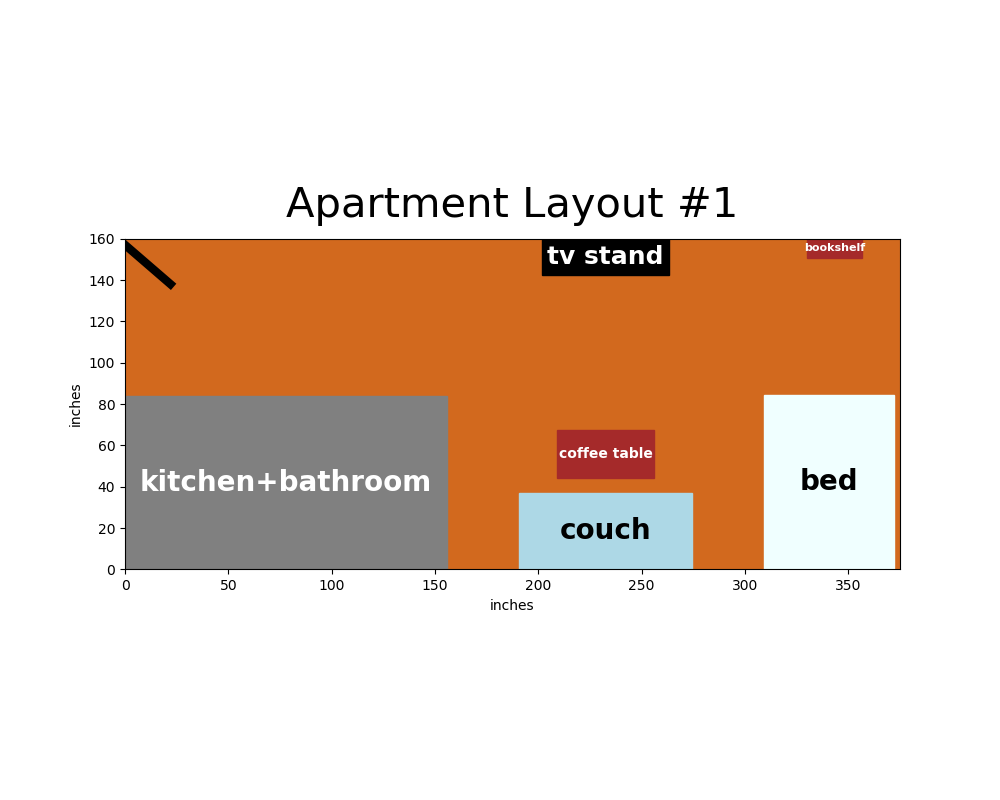

In [4]:
apt_height = 120
apt_width = 340

fig = plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('inches')
ax.set_ylabel('inches')

ax.set_facecolor('chocolate')
plt.xlim(0, apt_width)
plt.ylim(0, apt_height)
plt.title('Apartment Layout #1', fontsize=30, y=1.04)

# kitchen/bathroom area
kitch_width = 156
kitch_height = 84
kitchen = patches.Rectangle((0, 0), kitch_width, kitch_height, color='gray')
ax.add_patch(kitchen)
ax.annotate('kitchen+bathroom', (kitch_width/2.0, kitch_height/2.0), color='w', weight='bold', 
            fontsize=20, ha='center', va='center')

# bed
bed_width = 63
bed_height = 84.5
bed_x = apt_width - bed_width - 3
bed_y = 0
bed = patches.Rectangle((bed_x, bed_y), bed_width, bed_height, color='azure')
ax.add_patch(bed)
ax.annotate('bed', (bed_x + bed_width/2., bed_height/2.0), color='k', weight='bold', 
            fontsize=20, ha='center', va='center')

# couch
couch_width = 84
couch_height = 37
couch_x = kitch_width + (bed_x - kitch_width - couch_width) / 2.
couch_y = 0
couch = patches.Rectangle((couch_x, couch_y), couch_width, couch_height, color='lightblue')
ax.add_patch(couch)
ax.annotate('couch', (couch_x + couch_width/2.0, couch_height/2.0), color='k', weight='bold', 
            fontsize=20, ha='center', va='center')

# tv stand
tv_stand_height = 17.5
tv_stand_width = 61.5
tv_x = kitch_width + (bed_x - kitch_width - tv_stand_width) / 2.
tv_y = apt_height - tv_stand_height
tv = patches.Rectangle((tv_x, tv_y), tv_stand_width, tv_stand_height, color='black')
ax.add_patch(tv)
ax.annotate('tv stand', (tv_x + (tv_stand_width/2.), (apt_height - tv_stand_height/2.)),
                         color='w', weight='bold', fontsize=18, ha='center', va='center')

# bookshelf
bookshelf_height = 9.4
bookshelf_width = 26.7
bookshelf_x = apt_width - bed_width + (bed_width - bookshelf_width) / 2.
bookshelf_y = apt_height - bookshelf_height
bookshelf = patches.Rectangle((bookshelf_x, bookshelf_y), bookshelf_width, bookshelf_height, color='brown')
ax.add_patch(bookshelf)
ax.annotate('bookshelf', (bookshelf_x + (bookshelf_width/2.), (bookshelf_y + bookshelf_height/2.)),
                         color='w', weight='bold', fontsize=8, ha='center', va='center')

# coffee table
coffee_height = 23.25
coffee_width = 47.25
coffee_x = kitch_width + (bed_x - kitch_width - coffee_width) / 2.
coffee_y = couch_height + 7
coffee = patches.Rectangle((coffee_x, coffee_y), coffee_width, coffee_height, color='brown')
ax.add_patch(coffee)
ax.annotate('coffee table', (coffee_x + (coffee_width/2.), (coffee_y + coffee_height/2.)),
                         color='w', weight='bold', fontsize=10, ha='center', va='center')

# door
plt.plot([0, 22], [apt_height - 3, apt_height - 22], linewidth=6, color='k')

plt.show()

In [5]:
def plot_box(start_x, end_x, start_y, end_y, start_z, end_z, color='gray'):
    a, b = np.meshgrid([start_x, end_x], [start_y, end_y])
    c, d = np.meshgrid([start_x, end_x], [start_z, end_z])
    e, f = np.meshgrid([start_y, end_y], [end_y, end_y])
    
    ax.plot_surface(a, b, 0, alpha=0.5, color=color)
    ax.plot_surface(a, b, end_z, alpha=0.5, color=color)
    ax.plot_surface(c, start_y, d, alpha=0.5, color=color)
    ax.plot_surface(c, end_y, d, alpha=0.5, color=color)
    ax.plot_surface(start_x, e, d, alpha=0.5, color=color)
    ax.plot_surface(end_x, e, d, alpha=0.5, color=color)
    
    
def plot_door(start, finish):
    a, b = np.meshgrid([start, finish], [0, 2*apt_depth/3])
    ax.plot_surface(0, a, b, alpha=0.5, color='brown')
        
        
def plot_window(start, finish):
    a, b = np.meshgrid([start, finish], [apt_depth/4, 3*apt_depth/4])
    ax.plot_surface(apt_width + 5, a, b, alpha=0.5, color='green')

<IPython.core.display.Javascript object>


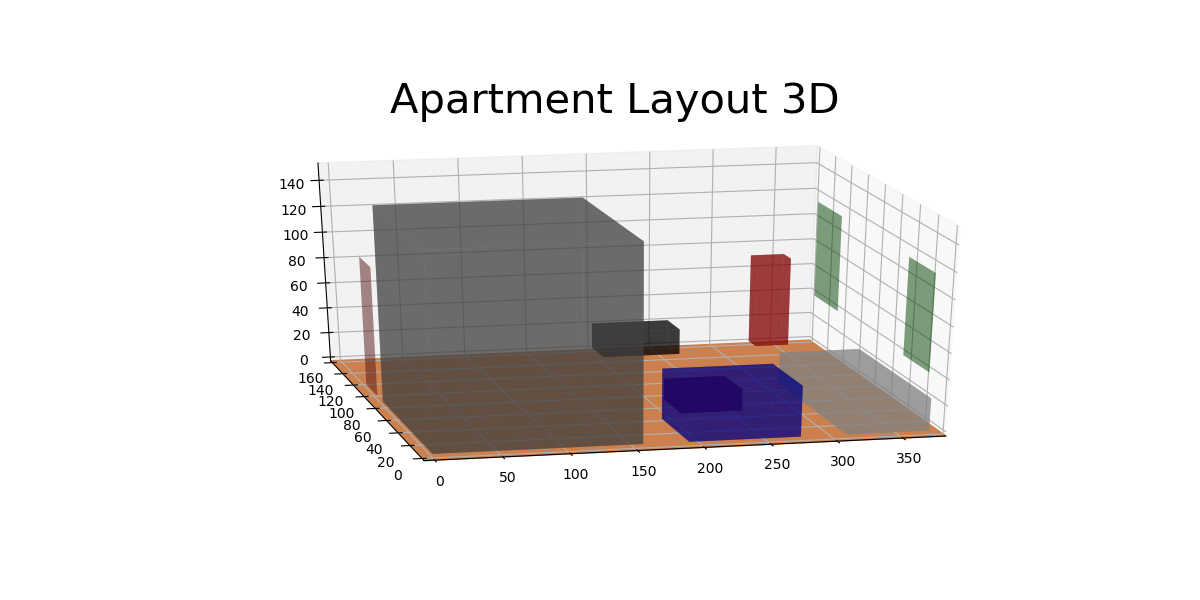

In [6]:
from mpl_toolkits.mplot3d import Axes3D

apt_depth = 150

fig = plt.figure(figsize=(12, 6))
ax = fig.gca(projection='3d')
ax.w_zaxis.set_pane_color((0.8, .5, .3, 1.0))

ax.set_xlim(0, apt_width)
ax.set_ylim(0, apt_height)
ax.set_zlim(0, apt_depth)
ax.set_aspect('equal')

plt.title('Apartment Layout 3D', fontsize=30, y=1.04)

# kitchen
plot_box(0, kitch_width, 0, kitch_height, 0, apt_depth)

# bed 
plot_box(bed_x, bed_x + bed_width, bed_y, bed_y + bed_height, 0, 25, color='white')

# couch
plot_box(couch_x, couch_x + couch_width, couch_y, couch_y + couch_height, 0, 39, color='blue')

# coffee table
plot_box(coffee_x, coffee_x + coffee_width, coffee_y, coffee_y + coffee_height, 0, 16.5, color='red')

# tv stand
plot_box(tv_x, tv_x + tv_stand_width, tv_y, tv_y + tv_stand_height, 0, 20, color='black')

# bookshelf
plot_box(bookshelf_x, bookshelf_x + bookshelf_width, bookshelf_y, bookshelf_y + bookshelf_height, 0, 70,
         color='red')

# door
plot_door(kitch_height + 10, kitch_height + 30)

# windows
plot_window(15, 45)
plot_window(apt_height-35, apt_height-5)

plt.show()

<IPython.core.display.Javascript object>


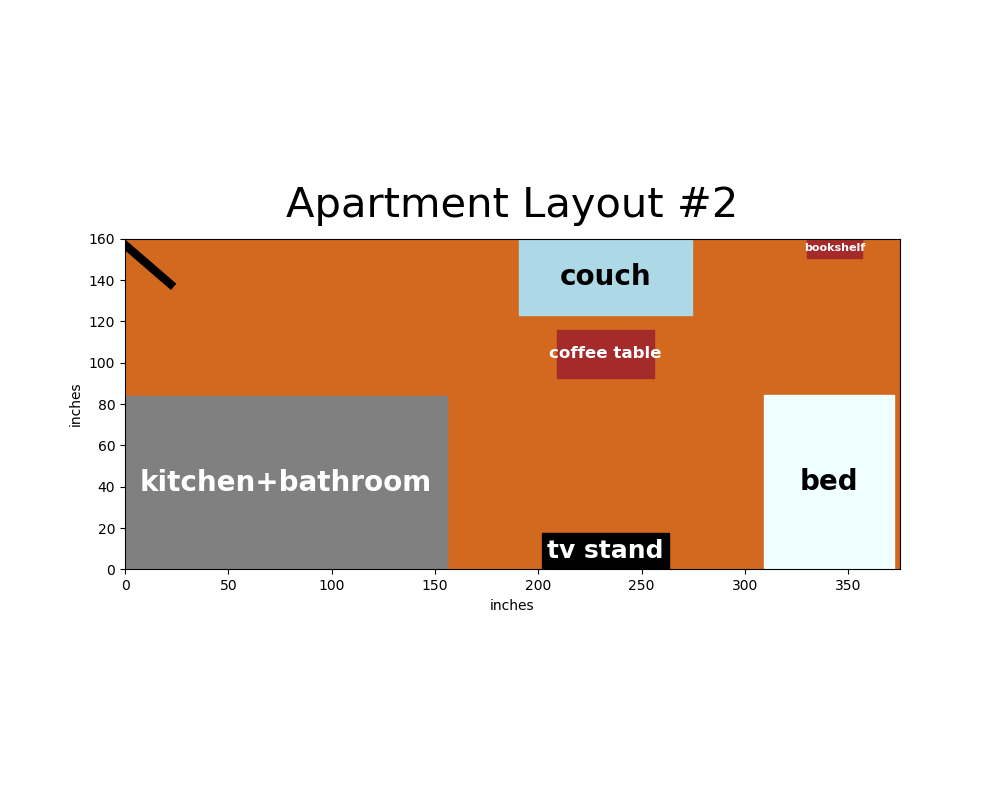

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('inches')
ax.set_ylabel('inches')

ax.set_facecolor('chocolate')
plt.xlim(0, apt_width)
plt.ylim(0, apt_height)
plt.title('Apartment Layout #2', fontsize=30, y=1.04)

# kitchen/bathroom area
kitchen = patches.Rectangle((0, 0), kitch_width, kitch_height, color='gray')
ax.add_patch(kitchen)
ax.annotate('kitchen+bathroom', (kitch_width/2.0, kitch_height/2.0), color='w', weight='bold', 
            fontsize=20, ha='center', va='center')

# bed
bed_x = apt_width - bed_width - 3
bed_y = 0
bed = patches.Rectangle((bed_x, bed_y), bed_width, bed_height, color='azure')
ax.add_patch(bed)
ax.annotate('bed', (bed_x + bed_width/2., bed_height/2.0), color='k', weight='bold', 
            fontsize=20, ha='center', va='center')

# couch
couch_x = kitch_width + (bed_x - kitch_width - couch_width) / 2.
couch_y = apt_height - couch_height
couch = patches.Rectangle((couch_x, couch_y), couch_width, couch_height, color='lightblue')
ax.add_patch(couch)
ax.annotate('couch', (couch_x + couch_width/2.0, apt_height - couch_height/2.0), color='k', weight='bold', 
            fontsize=20, ha='center', va='center')

# tv stand
tv_x = kitch_width + (bed_x - kitch_width - tv_stand_width) / 2.
tv_y = 0
tv = patches.Rectangle((tv_x, tv_y), tv_stand_width, tv_stand_height, color='black')
ax.add_patch(tv)
ax.annotate('tv stand', (tv_x + (tv_stand_width/2.), (tv_stand_height/2.)),
                         color='w', weight='bold', fontsize=18, ha='center', va='center')

# bookshelf
bookshelf_x = apt_width - bed_width + (bed_width - bookshelf_width) / 2.
bookshelf_y = apt_height - bookshelf_height
bookshelf = patches.Rectangle((bookshelf_x, bookshelf_y), bookshelf_width, bookshelf_height, color='brown')
ax.add_patch(bookshelf)
ax.annotate('bookshelf', (bookshelf_x + (bookshelf_width/2.), (bookshelf_y + bookshelf_height/2.)),
                         color='w', weight='bold', fontsize=8, ha='center', va='center')

# coffee table
coffee_x = kitch_width + (bed_x - kitch_width - coffee_width) / 2.
coffee_y = apt_height - couch_height - coffee_height - 7
coffee = patches.Rectangle((coffee_x, coffee_y), coffee_width, coffee_height, color='brown')
ax.add_patch(coffee)
ax.annotate('coffee table', (coffee_x + (coffee_width/2.), (coffee_y + coffee_height/2.)),
                         color='w', weight='bold', fontsize=12, ha='center', va='center')

# door
plt.plot([0, 22], [apt_height - 3, apt_height - 22], linewidth=6, color='k')

plt.show()

<IPython.core.display.Javascript object>


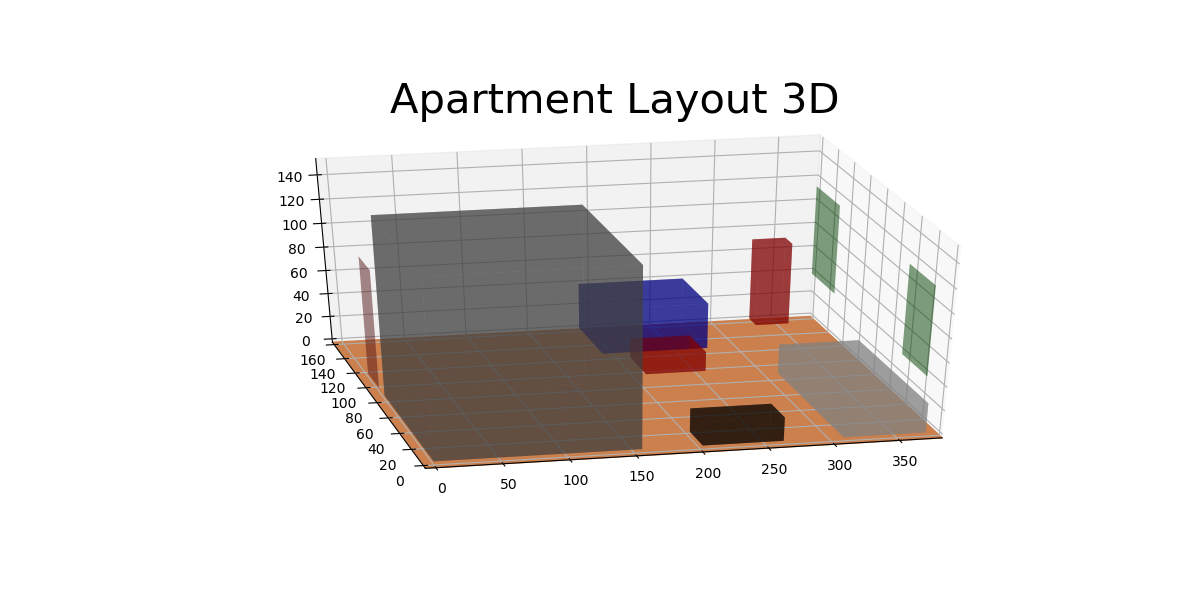

In [8]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca(projection='3d')
ax.w_zaxis.set_pane_color((0.8, .5, .3, 1.0))

ax.set_xlim(0, apt_width)
ax.set_ylim(0, apt_height)
ax.set_zlim(0, apt_depth)
ax.set_aspect('equal')

plt.title('Apartment Layout 3D', fontsize=30, y=1.04)

# kitchen
plot_box(0, kitch_width, 0, kitch_height, 0, apt_depth)

# bed 
plot_box(bed_x, bed_x + bed_width, bed_y, bed_y + bed_height, 0, 25, color='white')

# couch
plot_box(couch_x, couch_x + couch_width, couch_y, couch_y + couch_height, 0, 39, color='blue')

# coffee table
plot_box(coffee_x, coffee_x + coffee_width, coffee_y, coffee_y + coffee_height, 0, 16.5, color='red')

# tv stand
plot_box(tv_x, tv_x + tv_stand_width, tv_y, tv_y + tv_stand_height, 0, 20, color='black')

# bookshelf
plot_box(bookshelf_x, bookshelf_x + bookshelf_width, bookshelf_y, bookshelf_y + bookshelf_height, 0, 70,
         color='red')

# door
plot_door(kitch_height + 10, kitch_height + 30)

# windows
plot_window(15, 45)
plot_window(apt_height-30, apt_height)

plt.show()